## **House Price Prediction**

**test runtime type (ensure that this notebook ran using gpu)**

In [35]:
!nvidia-smi

Tue Jun 25 16:23:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [36]:
print(f"Required Stack\n\
Python 3.10.12\n\
geopandas                        0.13.2\n\
pandas                           2.0.3\n\
pandas-datareader                0.10.0\n\
pandas-gbq                       0.19.2\n\
pandas-stubs                     2.0.3.230814\n\
sklearn-pandas                   2.2.0\n\
numpy                            1.25.2\n\
matplotlib                       3.7.1\n\
matplotlib-inline                0.1.6\n\
matplotlib-venn                  0.11.10\n\
seaborn                          0.13.1\n\
sklearn-pandas                   2.2.0")

Required Stack
Python 3.10.12
geopandas                        0.13.2
pandas                           2.0.3
pandas-datareader                0.10.0
pandas-gbq                       0.19.2
pandas-stubs                     2.0.3.230814
sklearn-pandas                   2.2.0
numpy                            1.25.2
matplotlib                       3.7.1
matplotlib-inline                0.1.6
matplotlib-venn                  0.11.10
seaborn                          0.13.1
sklearn-pandas                   2.2.0


In [37]:
!python3 -V
!pip3 list | grep "pandas"
!pip3 list | grep "numpy"
!pip3 list | grep "matplotlib"
!pip3 list | grep "seaborn"
!pip3 list | grep "sklearn"

Python 3.10.12
geopandas                        0.13.2
pandas                           2.0.3
pandas-datareader                0.10.0
pandas-gbq                       0.19.2
pandas-stubs                     2.0.3.230814
sklearn-pandas                   2.2.0
numpy                            1.25.2
matplotlib                       3.7.1
matplotlib-inline                0.1.7
matplotlib-venn                  0.11.10
seaborn                          0.13.1
sklearn-pandas                   2.2.0


**import required module**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

**import dataset**

In [39]:
url = "https://raw.githubusercontent.com/alfian-putra/datasets_collection/main/california-housing-price.csv"
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**drop NaN value**

In [40]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [41]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

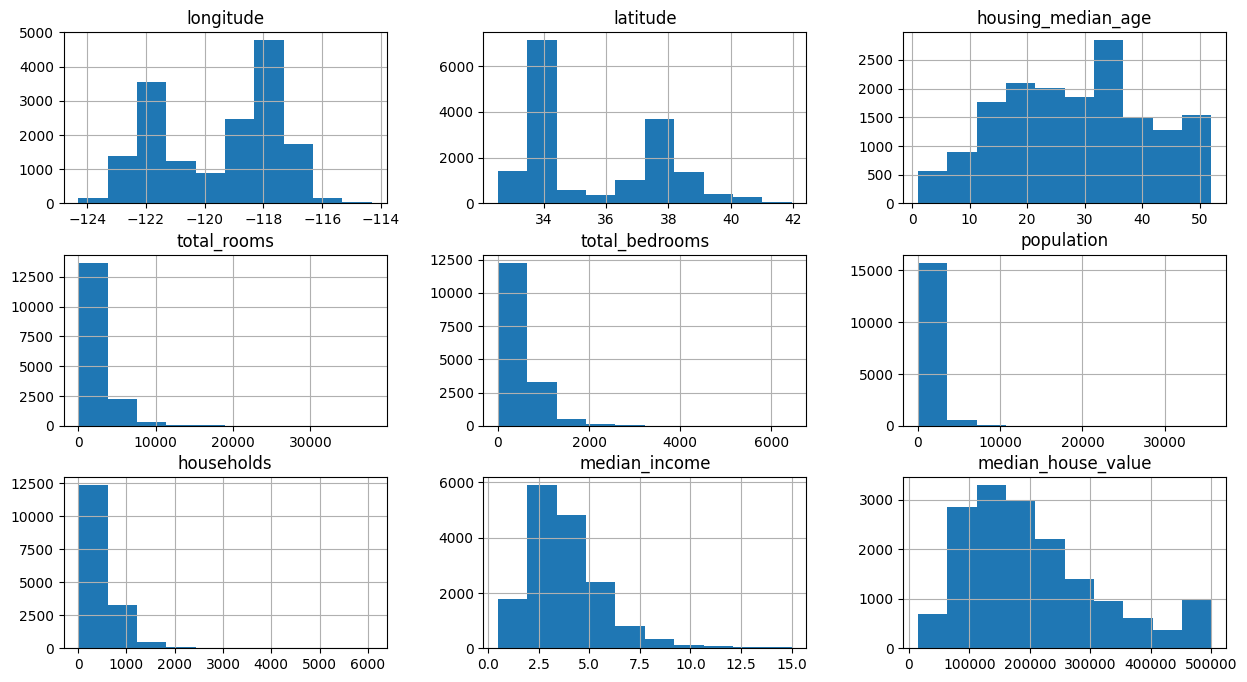

In [43]:
train_data.hist(figsize=(15,8))

<Axes: >

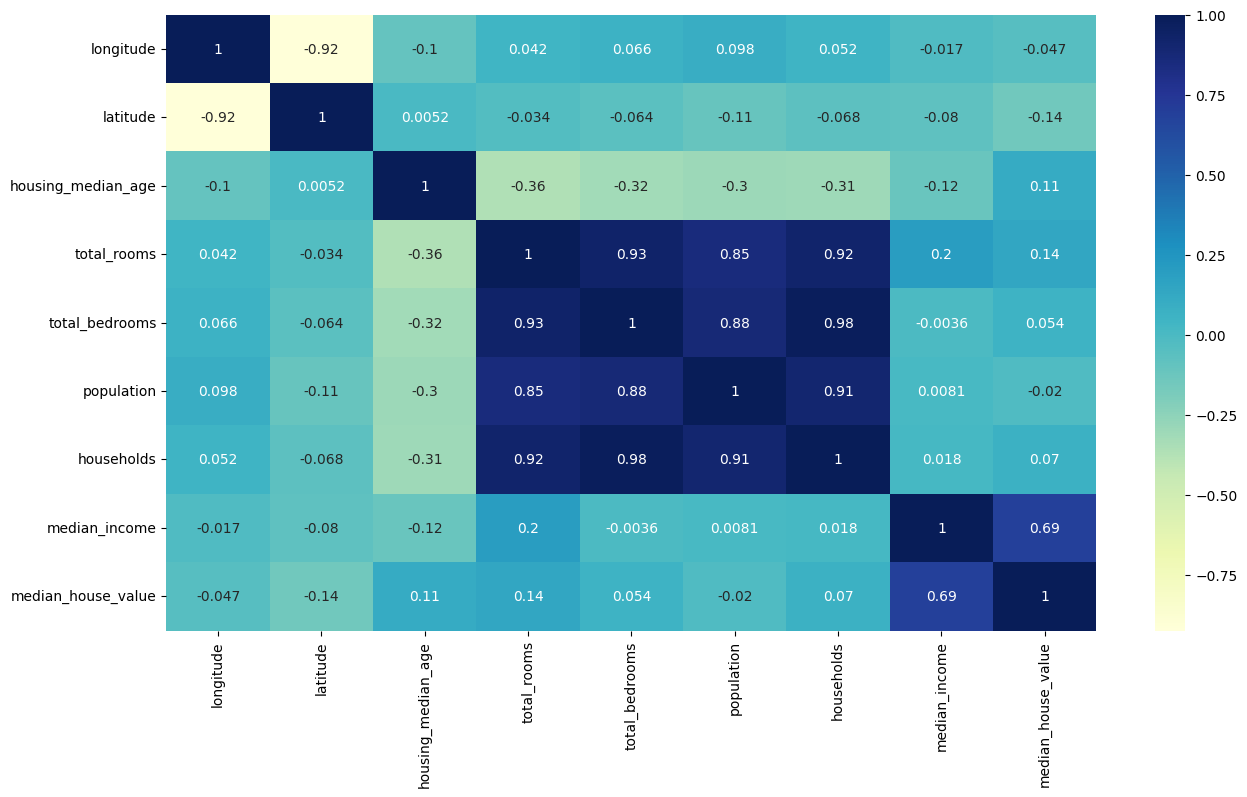

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [45]:
train_data["total_rooms"]  = np.log(train_data["total_rooms"] * 1)
train_data["total_bedrooms"]  = np.log(train_data["total_bedrooms"] * 1)
train_data["population"]  = np.log(train_data["population"] * 1)
train_data["households"]  = np.log(train_data["households"] * 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

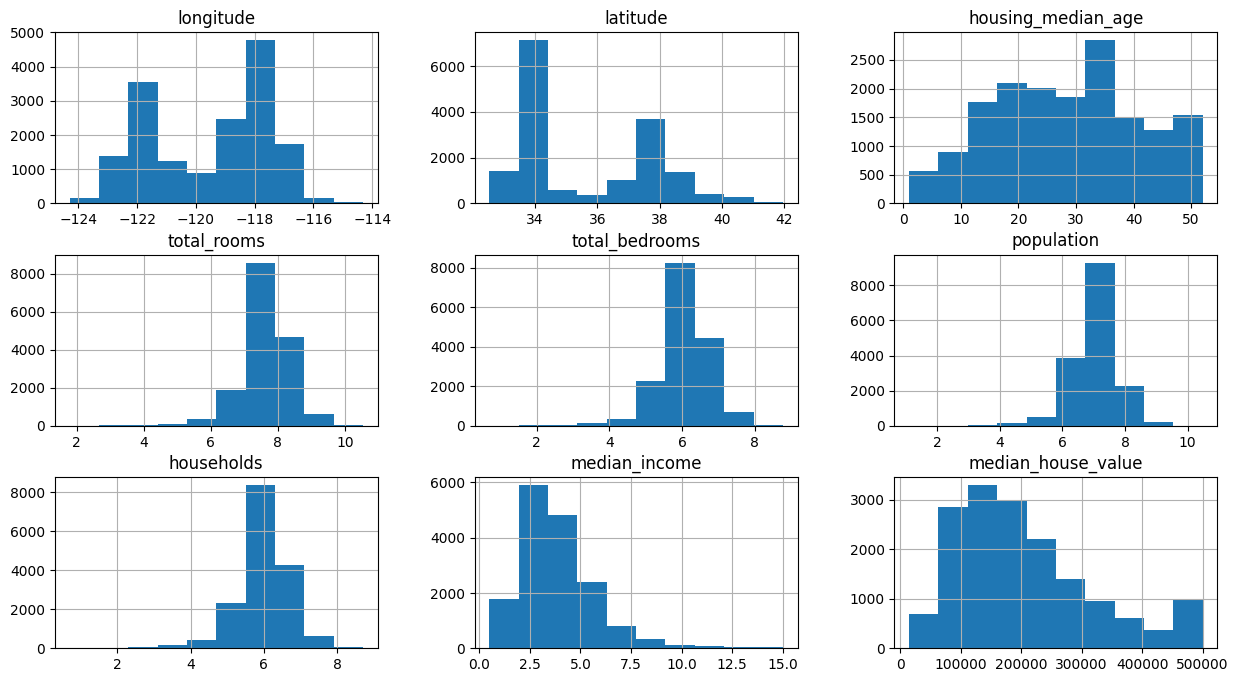

In [46]:
train_data.hist(figsize=(15,8))

In [47]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11298,-117.91,33.78,33.0,7.911691,6.308098,7.706613,6.282267,4.0362,<1H OCEAN,177900.0
13877,-117.31,34.43,16.0,8.542861,7.066467,8.047510,6.952729,1.6784,INLAND,71900.0
4657,-118.32,34.05,50.0,7.236339,5.897154,6.883463,5.710427,1.5882,<1H OCEAN,327300.0
16039,-122.47,37.71,44.0,7.842671,6.236370,7.363280,6.246107,4.1939,NEAR OCEAN,237900.0
1994,-119.77,36.73,44.0,7.580700,5.973810,7.159292,5.942799,2.1518,INLAND,53000.0
...,...,...,...,...,...,...,...,...,...,...
15481,-117.14,33.15,17.0,7.046647,5.204007,6.553933,5.257495,5.5696,<1H OCEAN,168400.0
8157,-118.12,33.81,36.0,7.849714,6.126869,7.051856,6.093570,4.6087,<1H OCEAN,224600.0
7795,-118.07,33.90,39.0,7.824846,6.302619,7.522400,6.249975,3.8846,<1H OCEAN,164100.0
2369,-119.57,36.71,10.0,7.412764,5.883322,6.864848,5.940171,2.6458,INLAND,84800.0


In [48]:
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

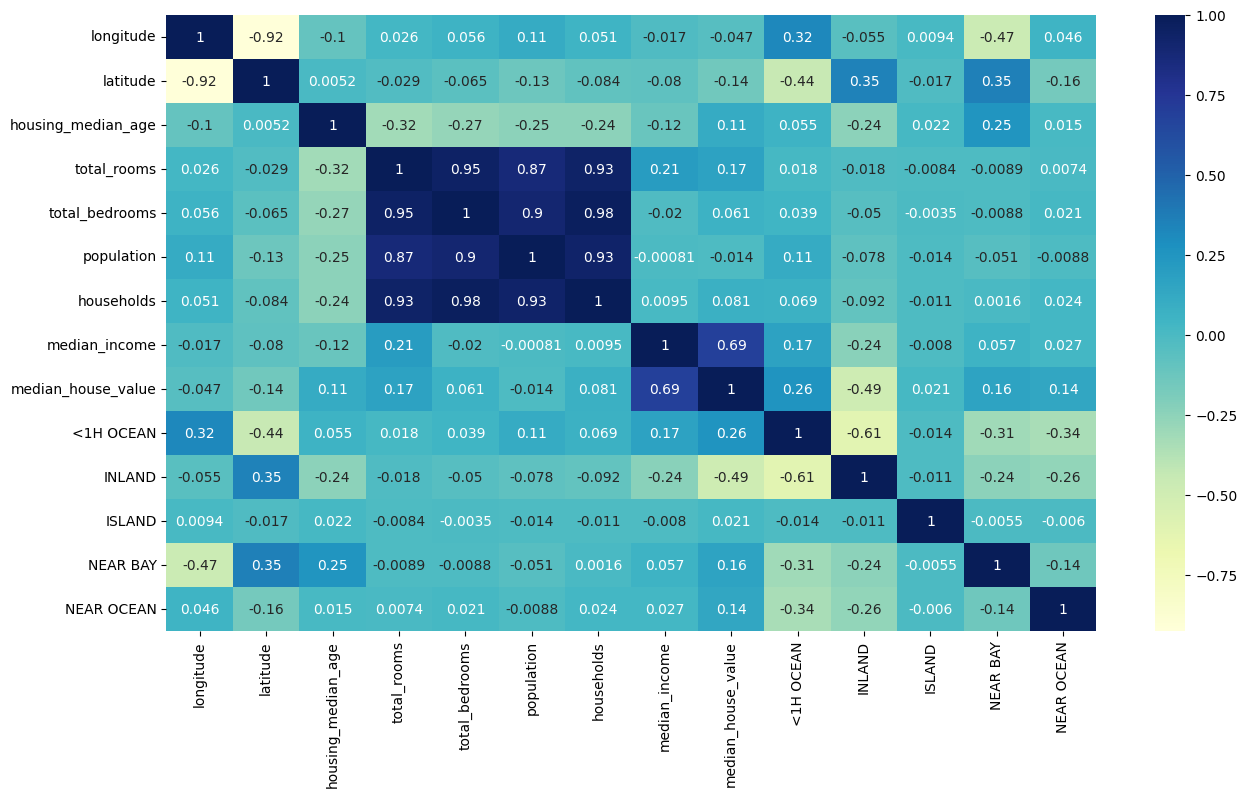

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

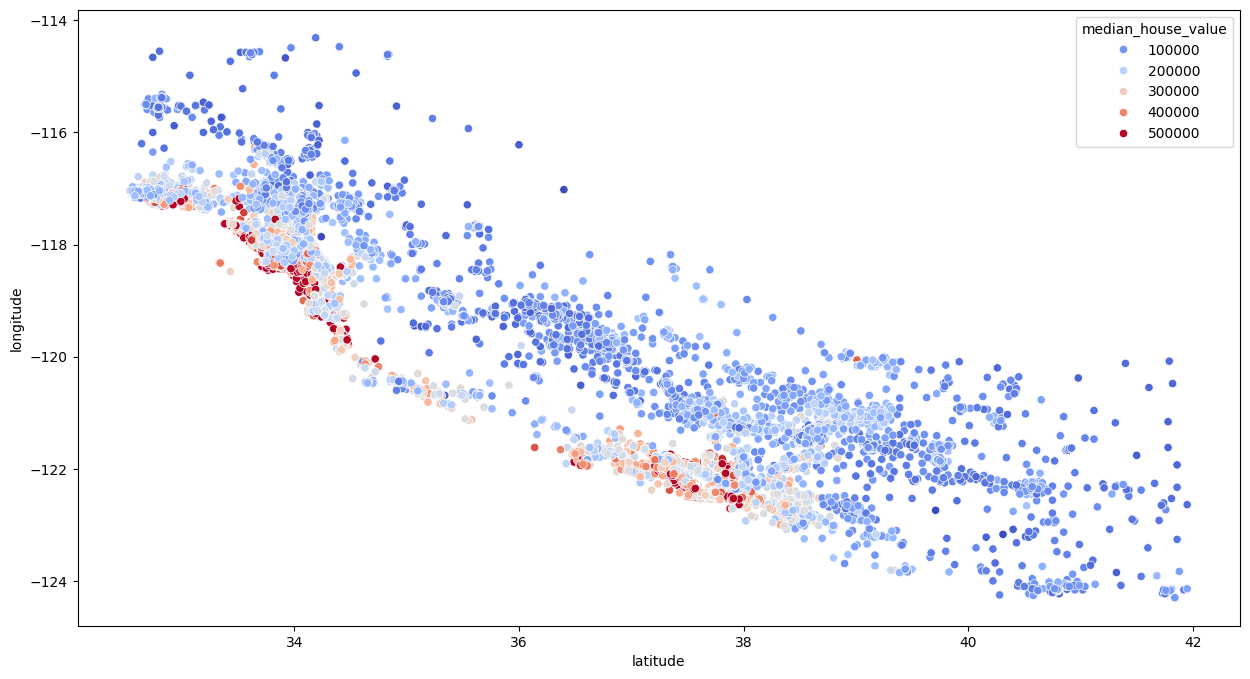

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude',y='longitude', data=train_data,hue='median_house_value', palette='coolwarm')

In [51]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

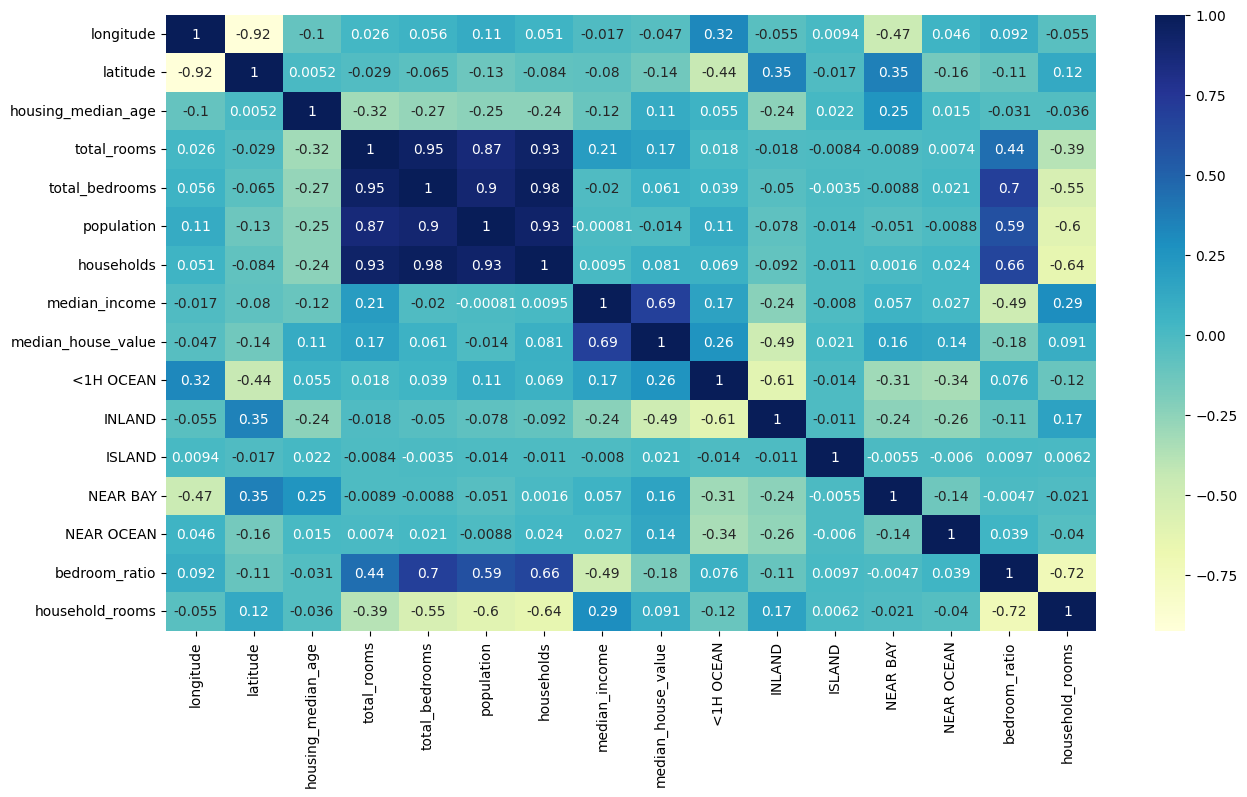

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [53]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [54]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] /test_data['households']

In [56]:
X_test , y_test = train_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [57]:
reg.score(X_train, y_train)

0.6696869708387394